[t-SNE](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) Visualization of MNIST in Torch7
-------------------
Adapted from the [manifold t-sne demo](https://github.com/clementfarabet/manifold/blob/master/demos/demo_tsne.lua).

Install manifold package using:  

    luarocks install manifold

In [1]:
m = require 'manifold';

In [2]:
N = 2000

In [3]:
mnist = require 'mnist';

In [4]:
testset = mnist.testdataset()

In [5]:
testset

{
  data : ByteTensor - size: 10000x28x28
  size : 10000
  label : ByteTensor - size: 10000
}


Extract 2000 images from the test set for visualization.

In [6]:
testset.size  = N
testset.data  = testset.data[{{1,N}}]
testset.label = testset.label[{{1,N}}]

In [7]:
testset

{
  data : ByteTensor - size: 2000x28x28
  size : 2000
  label : ByteTensor - size: 2000
}


Flatten image tensor.

In [8]:
x = torch.DoubleTensor(testset.data:size()):copy(testset.data)
x:resize(x:size(1), x:size(2) * x:size(3))
labels = testset.label

In [9]:
x:size()

 2000
  784
[torch.LongStorage of size 2]



ndims - t-SNE map of 2-dimensions  
perplexity - a learning parameter (usually between 5 and 50)  
use_bh - Whether to use the Barnes-Hut condition described [here](https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf)  
pca - t-SNE may not be fast enough for very high dimensions so we first reduce the number of dimensions to something that can be handled by t-SNE. This dimensionality reduction is done by your favorite DR algorithm PCA.  
theta - theta of the barnes-hut condition, described in Barnes-Hut t-SNE paper.   

In [10]:
opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = true, theta=0.5}
mapped_x1 = m.embedding.tsne(x, opts)

Performing preprocessing using PCA...	


Read the 2000 x 50 data matrix successfully!
Using current time as random seed...
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 0 of 2000
Done in 0.47 seconds (sparsity = 0.062834)!
Learning embedding...
Iteration 50: error is 78.128913 (50 iterations in 0.64 seconds)
Iteration 100: error is 77.246637 (50 iterations in 1.19 seconds)
Iteration 150: error is 75.563492 (50 iterations in 0.66 seconds)
Iteration 200: error is 75.532760 (50 iterations in 0.51 seconds)
Iteration 250: error is 3.809333 (50 iterations in 0.51 seconds)
Iteration 300: error is 1.802205 (50 iterations in 0.46 seconds)
Iteration 350: error is 1.546874 (50 iterations in 0.45 seconds)
Iteration 400: error is 1.432692 (50 iterations in 0.46 seconds)
Iteration 450: error is 1.378945 (50 iterations in 0.46 seconds)
Iteration 500: error is 1.358226 (50 iterations in 0.45 seconds)
Iteration 550: error is 1.347348 (50 iterations in 0.46 seconds)
It

In [11]:
mapped_x1:size()

 2000
    2
[torch.LongStorage of size 2]



In [12]:
im_size = 4096
map_im = m.draw_image_map(mapped_x1, x:resize(x:size(1), 1, 28, 28), im_size, 0, true)

Right-click and open image in new tab to properly view the digits.

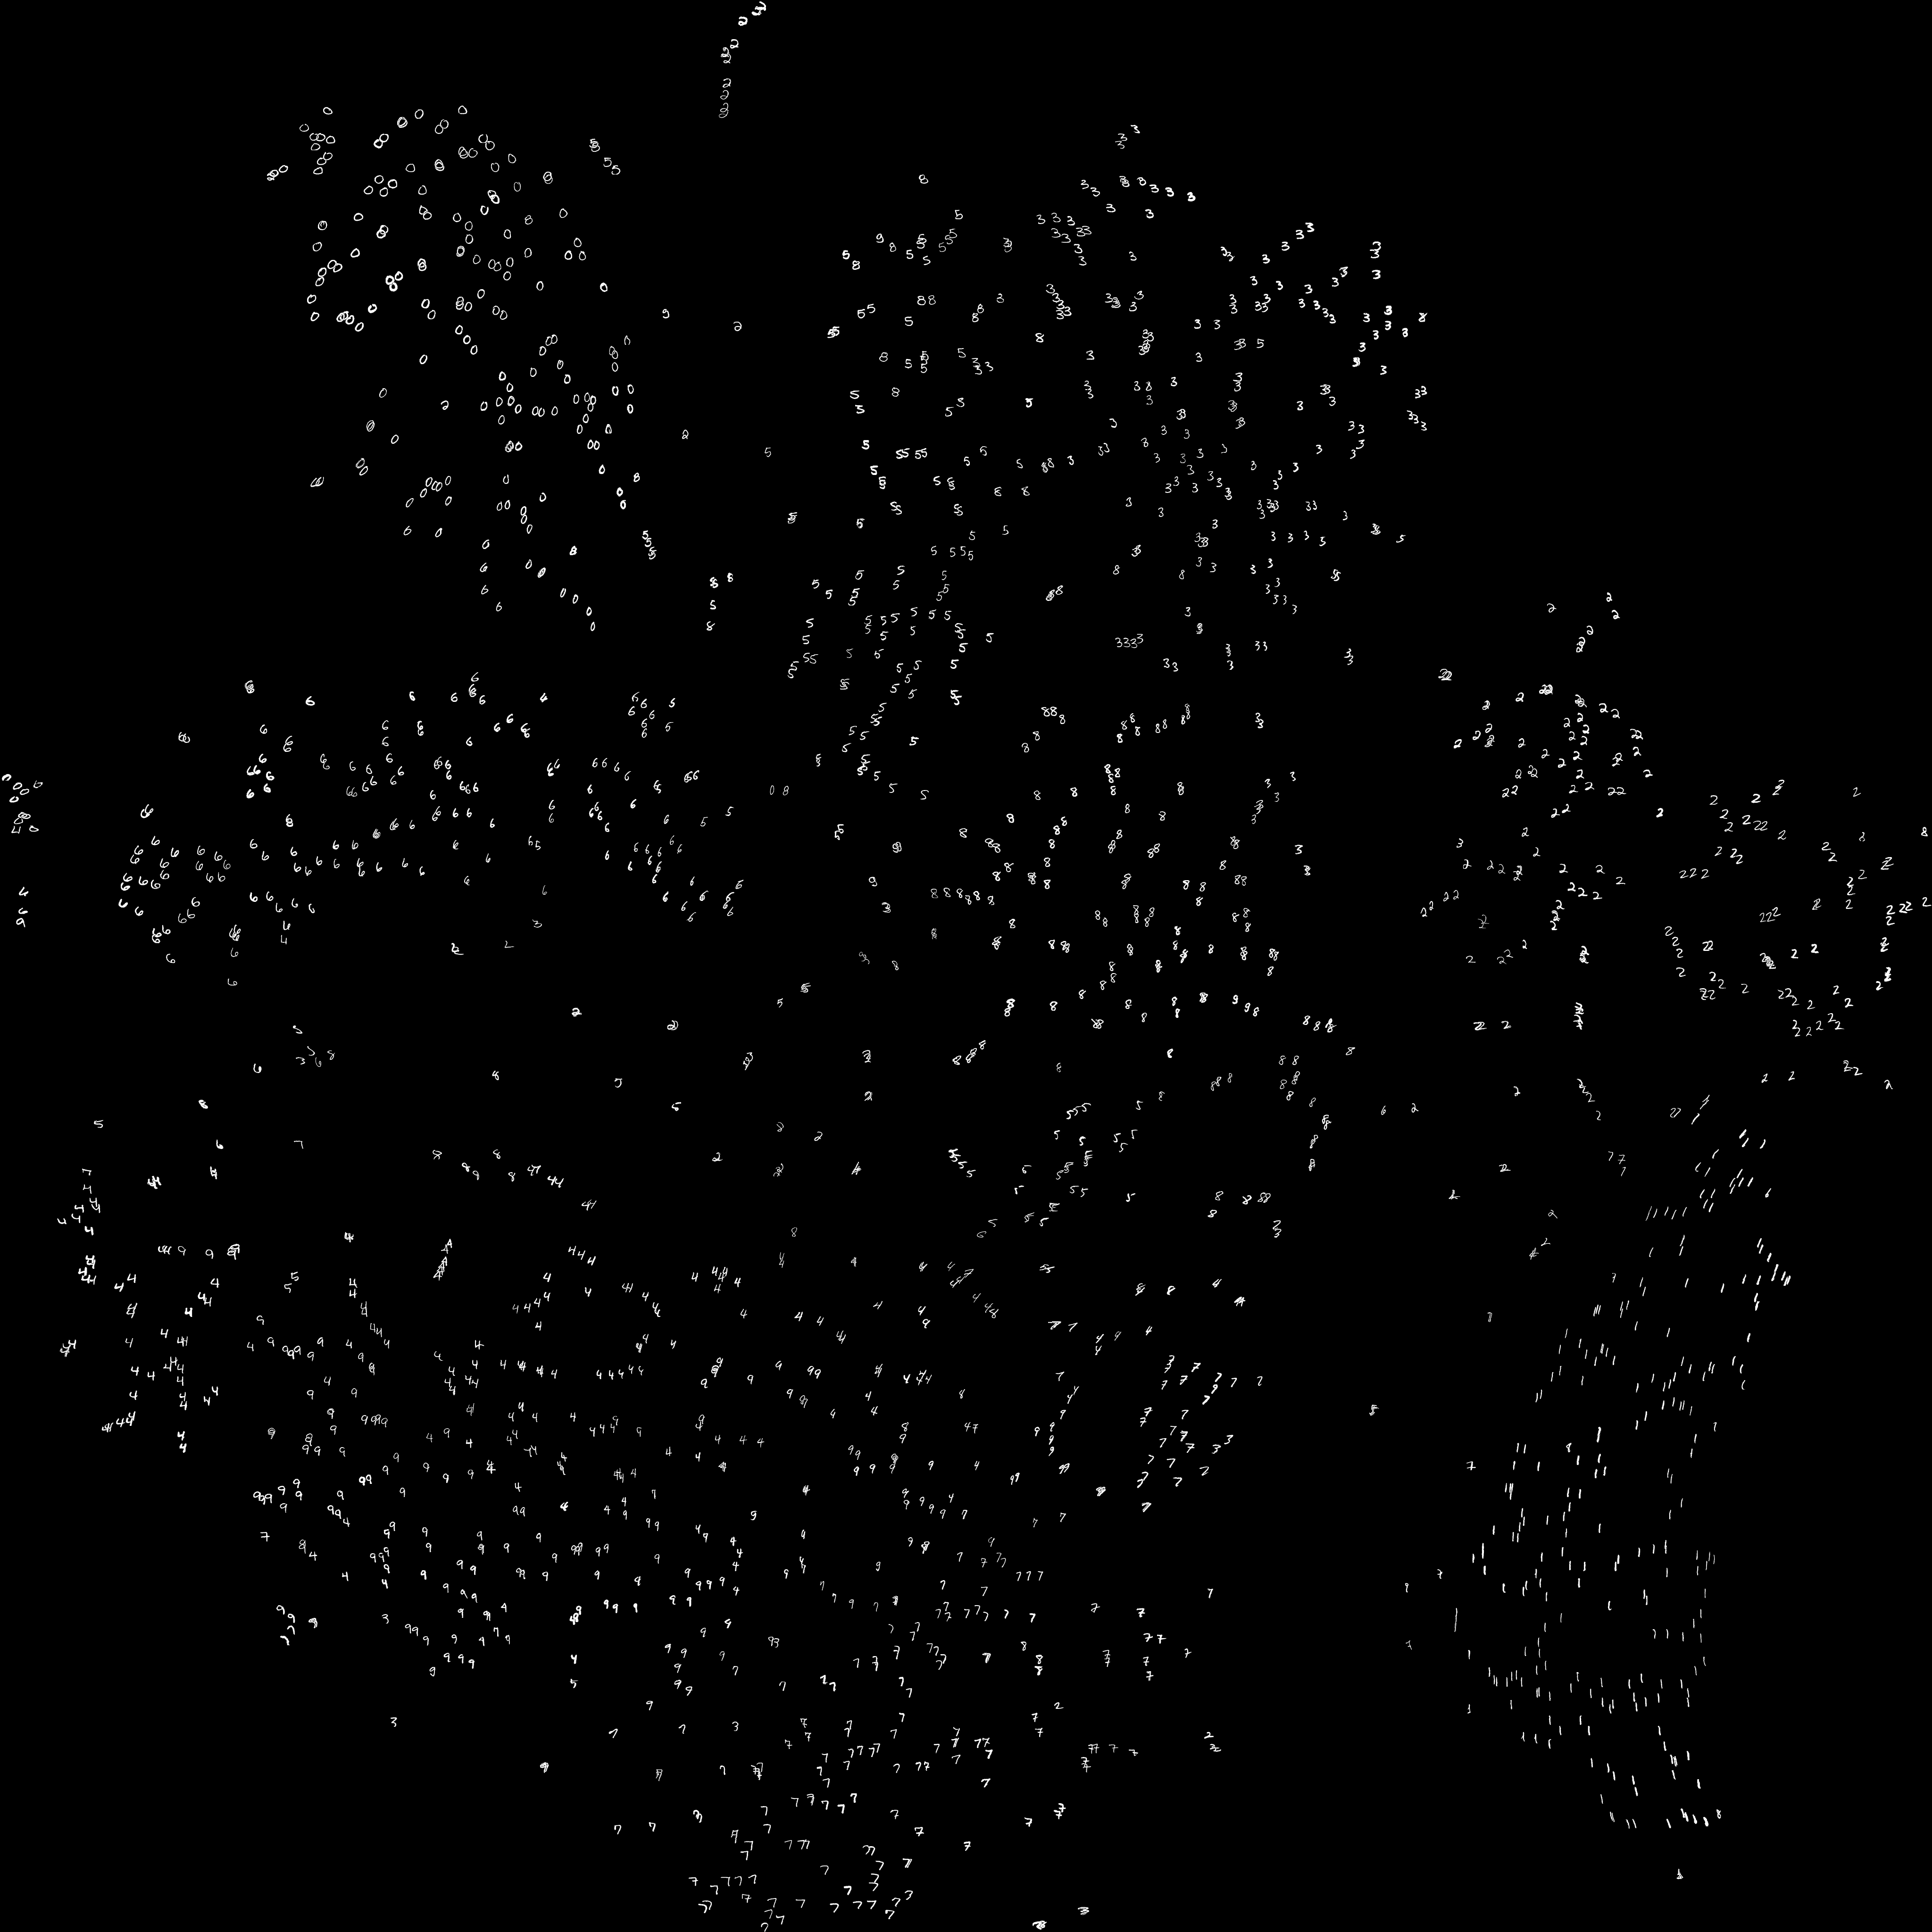

In [13]:
itorch.image(map_im)